In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
inspector = inspect(engine)

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
columns_m = inspector.get_columns('Measurement')
for column in columns_m:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns_s = inspector.get_columns('Station')
for column in columns_s:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
latest = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
latest

('2017-08-23')

In [15]:
# Calculate the date 1 year ago from the last data point in the database
d = dt.date(2017, 8, 23) - dt.timedelta(days=365)
d


datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
most_recent_12m = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= d).order_by(Measurement.date.desc()).all()
most_recent_12m

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = pd.DataFrame(most_recent_12m, columns=["Date", "PRCP"])
prcp.head()

,Date,PRCP
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [18]:
prcp.set_index("Date")
prcp.head()

,Date,PRCP
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [19]:
Precipitation = prcp.dropna(how='any')
Precipitation.head()

,Date,PRCP
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


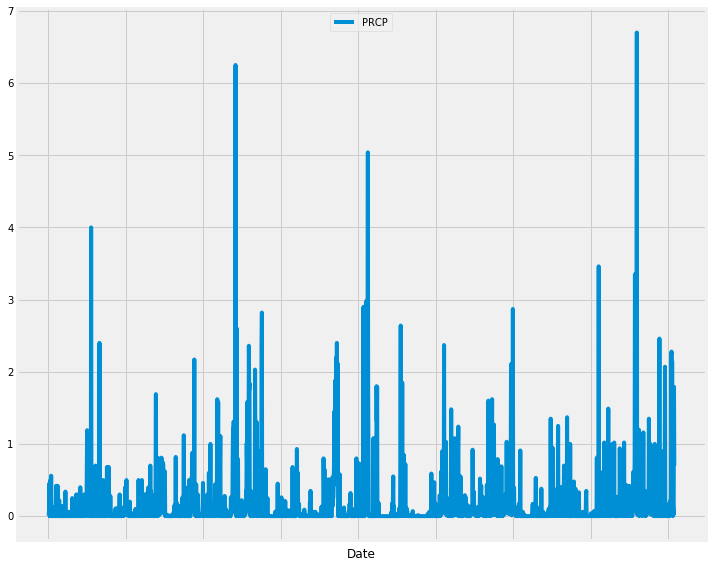

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
Precipitation.plot("Date", "PRCP", figsize=(10,8))
plt.legend(loc= "upper center")
plt.tight_layout()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitation.describe()

,PRCP
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
stations_available = session.query(Station.station).count()
stations_available

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
                           group_by(Measurement.station).order_by(func.count(Measurement.station).\
                                                                 desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
topStation = most_active[0]

In [26]:
# Using the station id from the previous query, 
# calculate the lowest temperature recorded, highest temperature recorded, 
# and average temperature most active station?
lowest_highest_avg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == topStation[0]).order_by(func.min(Measurement.tobs).\
                                                  desc()).first()
lowest_highest_avg

(54.0, 85.0, 71.66378066378067)

In [27]:
# Choose the station with the highest number of temperature observations.
topStation

('USC00519281', 2772)

In [40]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_recent_12m = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= d).filter(Measurement.station == topStation[0]).\
    order_by(Measurement.tobs).all()
top_recent_12m

[('2017-02-02', 59.0),
 ('2017-02-08', 59.0),
 ('2017-02-09', 59.0),
 ('2017-02-03', 60.0),
 ('2017-04-30', 60.0),
 ('2017-02-25', 61.0),
 ('2016-12-15', 62.0),
 ('2017-01-06', 62.0),
 ('2017-01-09', 62.0),
 ('2017-01-10', 62.0),
 ('2017-02-10', 62.0),
 ('2017-03-07', 62.0),
 ('2016-11-07', 63.0),
 ('2017-01-04', 63.0),
 ('2017-01-05', 63.0),
 ('2017-01-11', 63.0),
 ('2017-01-03', 64.0),
 ('2017-02-07', 64.0),
 ('2017-03-08', 64.0),
 ('2016-12-13', 65.0),
 ('2017-01-12', 65.0),
 ('2017-01-28', 65.0),
 ('2017-02-16', 65.0),
 ('2017-02-27', 65.0),
 ('2017-03-18', 65.0),
 ('2017-05-01', 65.0),
 ('2016-12-12', 66.0),
 ('2017-01-27', 66.0),
 ('2017-03-10', 66.0),
 ('2017-03-13', 66.0),
 ('2017-03-16', 66.0),
 ('2016-11-10', 67.0),
 ('2016-12-05', 67.0),
 ('2016-12-06', 67.0),
 ('2016-12-31', 67.0),
 ('2017-02-26', 67.0),
 ('2017-03-06', 67.0),
 ('2017-03-09', 67.0),
 ('2017-03-14', 67.0),
 ('2017-04-04', 67.0),
 ('2017-04-06', 67.0),
 ('2017-04-10', 67.0),
 ('2017-04-17', 67.0),
 ('2017-04-

In [42]:
# Save the query results as a Pandas DataFrame and set the index to the date column
temp = pd.DataFrame(top_recent_12m, columns=["Date", "Temp"])
temp.head()

,Date,Temp
0,2017-02-02,59.0
1,2017-02-08,59.0
2,2017-02-09,59.0
3,2017-02-03,60.0
4,2017-04-30,60.0


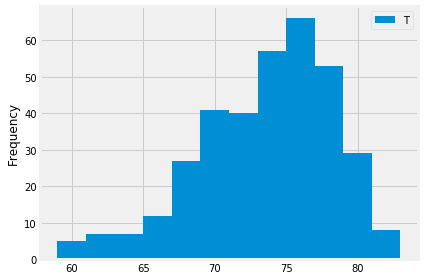

In [65]:
plt.hist(temp['Temp'], bins=12)
plt.ylabel("Frequency")
plt.legend('Temp', loc="upper right")
plt.tight_layout()
plt.show()

In [66]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-08-01', '2017-08-08'))

[(72.0, 79.15625, 83.0)]


In [70]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacation = calc_temps('2017-08-01', '2017-08-08')
vacation

[(72.0, 79.15625, 83.0)]

In [98]:
tmin = vacation[0][0]
tmax = vacation[0][1]
tavg = vacation[0][2]
print(tmin)
print(tmax)
print(tavg)

72.0
79.15625
83.0


In [99]:
peak = tmax - tmin
peak

7.15625

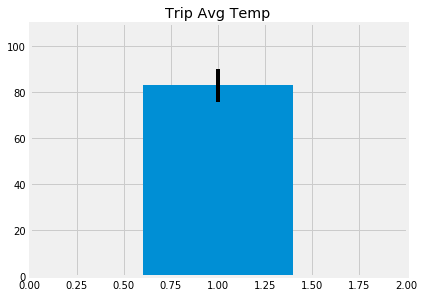

In [100]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(1,tavg)
plt.errorbar(1,tavg, yerr= peak, color="black")

plt.xlim(0,2)
plt.ylim(0,110)
plt.tight_layout()
plt.title("Trip Avg Temp")

plt.show()

# This is labeled as Optional in the assignment README

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
